In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
ac_origin=pd.read_csv('data/도로교통공단_어린이 교통사고 현황_20191231.csv',encoding='cp949')
ac_origin.head(5)

,발생일,발생시간,주야,요일,사망자수,중상자수,경상자수,부상신고자수,발생지_시도,발생지_시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별
0,2015-01-01,1,야,목,0,1,0,0,경기,의왕시,차대사람,횡단중,횡단중,신호위반,단일로,횡단보도상,승용차,보행자
1,2015-01-01,1,야,목,0,0,2,0,경북,구미시,차대차,측면충돌,측면충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차
2,2015-01-01,2,야,목,0,0,2,0,강원,고성군,차대차,추돌,진행중 추돌,안전운전 의무 불이행,단일로,기타단일로,승합차,승용차
3,2015-01-01,9,주,목,0,1,0,0,충남,예산군,차대차,기타,기타,안전운전 의무 불이행,교차로,교차로내,승용차,승용차
4,2015-01-01,9,주,목,0,0,1,0,전남,나주시,차대차,측면충돌,측면충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,승용차


In [4]:
ac1=ac_origin[ac_origin['발생지_시도']=='서울']
ac1=ac1[ac1['사고유형_대분류']=='차대사람']
ac1=ac1[ac1['발생지_시군구']=='송파구']
ac1=ac1.loc[:,['발생일','사망자수','중상자수','경상자수','부상신고자수']]
ac1['발생일'] = pd.to_datetime(ac1['발생일'])
ac1['발생일'] = ac1['발생일'].dt.year
ac1['총사상자']=ac1['사망자수']+ac1['중상자수']+ac1['경상자수']+ac1['부상신고자수']
ac1

,발생일,사망자수,중상자수,경상자수,부상신고자수,총사상자
332,2015,0,0,1,0,1
475,2015,0,0,0,1,1
595,2015,0,1,0,0,1
811,2015,0,1,0,0,1
818,2015,0,0,1,0,1
...,...,...,...,...,...,...
54375,2019,0,1,0,0,1
54551,2019,0,0,1,0,1
54752,2019,0,0,1,0,1
54978,2019,0,0,1,0,1


In [5]:
group=ac1.groupby(ac1['발생일'])
group

In [6]:
d1=group.sum()
d1

,사망자수,중상자수,경상자수,부상신고자수,총사상자
발생일,,,,,
2015,0,16,24,13,53
2016,0,9,33,17,59
2017,0,16,20,11,47
2018,0,5,25,12,42
2019,0,9,33,14,56


In [7]:
data={}
with open("data/yellow.json",'r') as jsonfile:
    data=json.load(jsonfile)
yellow=pd.DataFrame(data['yellow'])
yellow

,school,date,juso,lat,lon
0,서울일원초등학교,2019-01-01,서울특별시 강남구 영동대로4길 20,37.489812561,127.076141760
1,서울자곡초등학교,2019-01-01,서울특별시 강남구 자곡로 150,37.472049387,127.099482587
2,서울대진초등학교,2019-01-01,서울특별시 강남구 개포로109길 74,37.496971718,127.077691950
3,서울논현초등학교,2019-01-01,서울특별시 강남구 강남대로120길 33,37.508473191,127.026179794
4,서울대왕초등학교,2019-01-01,서울특별시 강남구 헌릉로618길 8,37.464638866,127.105303933
...,...,...,...,...,...
218,서울연천초등학교,2017-06-22,서울특별시 은평구 연서로34길 22,37.621017204,126.929430411
219,서울구산초등학교,2017-09-29,서울특별시 은평구 서오릉로15길 16,37.612766181,126.910004237
220,서울진관초등학교,2017-10-13,서울특별시 은평구 진관4로 78-16,37.645420032,126.929052606
221,서울은빛초등학교,2017-10-23,서울특별시 은평구 진관3로 73-17,37.642683200,126.918730426


In [8]:
# 강남구 19(6) 20(18)
### 은평구 16(3) 17(13) 18(1)                 : 33-23-29
### 광진구 16(1) 17(7) 18 (1) 19(4) 20 (1)   : 22-23-20-29
# 강북구 17(1) 18(3) 19(1)
######## 관악구 15(1) 16(1) 17(9) 18(2) 19(1)     : 23-20-24-14
### 송파구 16(2) 17(3) 18(1) 19(6) 20(6)    : 56-47-51-54
### 성동구 17(5) 18(7) 19(1) 20(7)         : 19-8-15-15
### 동작구 16(9) 17(2) 18(1) 19(1)         : 22-32-17-27-24
# 마포구 16(4) 17(2)
####### 서대문구 16(4) 17(3) 18(2)            : 29-13-15-12
# 영등포구 16(1) 17(2) 20(1)
### 양천구 16(3) 17(5) 18(2) 19(4)        ; 27- 38 --
### 구로구 16(1) 17(5) 18(3) 19(8) 20(3)  : 31- 26 -23- 44
### 금천구 16(5) 17(1) 19(4)              : 23- 18- 7- 18
### 중랑구 16(1) 17(3) 18(2) 19(6)
# 동대문구 21(4)
###도 봉구 16(5) 17(6) 18(4)              : 20- 18- 18 -18


In [9]:
##
yellow2=yellow[yellow['juso'].str.contains('송파구')]
yellow2=yellow2.loc[:,['date']]
yellow2['date']=pd.to_datetime(yellow2['date'])
yellow2['date']=yellow2['date'].dt.year
yellow2['date']=pd.to_numeric(yellow2['date'])
yellow2=yellow2[yellow2['date']<=2019]
yellow2

,date
77,2016
78,2016
79,2017
80,2017
82,2019
83,2017
84,2018
85,2019
86,2019
87,2019


In [10]:
d2=yellow2['date'].value_counts()
d2

2019    6
2017    3
2016    2
2018    1
Name: date, dtype: int64

In [11]:
data=pd.concat([d1,d2],axis=1)
data

,사망자수,중상자수,경상자수,부상신고자수,총사상자,date
2015,0,16,24,13,53,NaN
2016,0,9,33,17,59,2.0
2017,0,16,20,11,47,3.0
2018,0,5,25,12,42,1.0
2019,0,9,33,14,56,6.0


In [12]:
data=data.loc[:,['총사상자','date']]
data

,총사상자,date
2015,53,NaN
2016,59,2.0
2017,47,3.0
2018,42,1.0
2019,56,6.0


<function matplotlib.pyplot.show(close=None, block=None)>

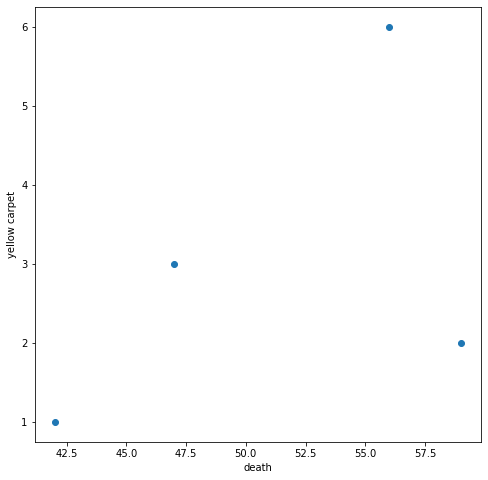

In [13]:
death=np.array(data['총사상자'])
yc=np.array(data['date'])

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)

ax.scatter(death,yc)
ax.set_xlabel('death')
ax.set_ylabel('yellow carpet')

plt.show

In [14]:
########################################

In [15]:
ac11=ac_origin[ac_origin['발생지_시도']=='서울']
ac11=ac11[ac11['사고유형_대분류']=='차대사람']
ac11=ac11.loc[:,['발생일','사망자수','중상자수','경상자수','부상신고자수']]
ac11['발생일'] = pd.to_datetime(ac11['발생일'])
ac11['발생일'] = ac11['발생일'].dt.year
ac11['총사상자']=ac11['사망자수']+ac11['중상자수']+ac11['경상자수']+ac11['부상신고자수']
ac11

,발생일,사망자수,중상자수,경상자수,부상신고자수,총사상자
72,2015,0,2,0,0,2
96,2015,0,0,0,1,1
107,2015,0,0,1,0,1
129,2015,0,0,1,0,1
137,2015,0,0,1,0,1
...,...,...,...,...,...,...
55382,2019,0,0,0,1,1
55426,2019,0,0,0,1,1
55432,2019,0,0,1,0,1
55454,2019,0,0,0,1,1


In [16]:
group=ac11.groupby(ac11['발생일'])
group

In [17]:
d11=group.sum()
d11

,사망자수,중상자수,경상자수,부상신고자수,총사상자
발생일,,,,,
2015,5,203,434,108,750
2016,6,168,375,119,668
2017,1,166,371,90,628
2018,1,121,364,85,571
2019,3,135,420,89,647


In [18]:
yellow22=yellow.loc[:,['date']]
yellow22['date']=pd.to_datetime(yellow22['date'])
yellow22['date']=yellow22['date'].dt.year
yellow22['date']=pd.to_numeric(yellow22['date'])
yellow22=yellow22[yellow22['date']<=2019]
yellow22

,date
0,2019
1,2019
2,2019
3,2019
4,2019
...,...
218,2017
219,2017
220,2017
221,2017


In [19]:
d22=yellow22['date'].value_counts()
d22=d22.loc[[2015,2016,2017,2018,2019]]
d22=d22.cumsum()
d22

2015      1
2016     42
2017    111
2018    140
2019    185
Name: date, dtype: int64

In [20]:
data1=pd.concat([d11,d22],axis=1)
data1

,사망자수,중상자수,경상자수,부상신고자수,총사상자,date
2015,5,203,434,108,750,1
2016,6,168,375,119,668,42
2017,1,166,371,90,628,111
2018,1,121,364,85,571,140
2019,3,135,420,89,647,185


In [21]:
data1.corr()

,사망자수,중상자수,경상자수,부상신고자수,총사상자,date
사망자수,1.000000,0.608577,0.448106,0.935946,0.761717,-0.694137
중상자수,0.608577,1.000000,0.476820,0.686789,0.897990,-0.882371
경상자수,0.448106,0.476820,1.000000,0.183717,0.778805,-0.224889
부상신고자수,0.935946,0.686789,0.183717,1.000000,0.683037,-0.824378
총사상자,0.761717,0.897990,0.778805,0.683037,1.000000,-0.751155
date,-0.694137,-0.882371,-0.224889,-0.824378,-0.751155,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

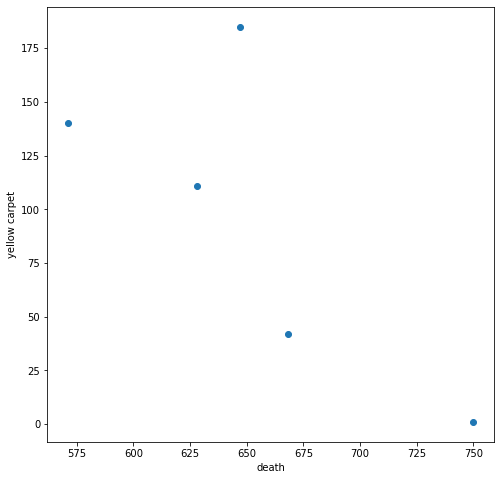

In [22]:
death1=np.array(data1['총사상자'])
yc1=np.array(data1['date'])

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)

ax.scatter(death1,yc1)
ax.set_xlabel('death')
ax.set_ylabel('yellow carpet')

plt.show

In [23]:
data1['총사상자'].corr(data1['date'])

-0.7511546819454759

In [24]:
data1.corr()

,사망자수,중상자수,경상자수,부상신고자수,총사상자,date
사망자수,1.000000,0.608577,0.448106,0.935946,0.761717,-0.694137
중상자수,0.608577,1.000000,0.476820,0.686789,0.897990,-0.882371
경상자수,0.448106,0.476820,1.000000,0.183717,0.778805,-0.224889
부상신고자수,0.935946,0.686789,0.183717,1.000000,0.683037,-0.824378
총사상자,0.761717,0.897990,0.778805,0.683037,1.000000,-0.751155
date,-0.694137,-0.882371,-0.224889,-0.824378,-0.751155,1.000000


In [25]:
data1

,사망자수,중상자수,경상자수,부상신고자수,총사상자,date
2015,5,203,434,108,750,1
2016,6,168,375,119,668,42
2017,1,166,371,90,628,111
2018,1,121,364,85,571,140
2019,3,135,420,89,647,185


In [26]:
import scipy.stats as stats

In [27]:
stats.spearmanr(data1['총사상자'],data1['date'])

SpearmanrResult(correlation=-0.7, pvalue=0.1881204043741873)

In [28]:
stats.spearmanr(data1['부상신고자수'],data1['date'])

SpearmanrResult(correlation=-0.7999999999999999, pvalue=0.10408803866182788)

In [29]:
stats.spearmanr(data1['경상자수'],data1['date'])

SpearmanrResult(correlation=-0.39999999999999997, pvalue=0.5046315754686911)

In [30]:
stats.spearmanr(data1['중상자수'],data1['date'])

SpearmanrResult(correlation=-0.8999999999999998, pvalue=0.03738607346849874)

In [31]:
stats.spearmanr(data1['사망자수'],data1['date'])

SpearmanrResult(correlation=-0.5642880936468347, pvalue=0.32172333582430024)

In [32]:
stats.kendalltau(data1['사망자수'],data1['date'])

KendalltauResult(correlation=-0.31622776601683794, pvalue=0.44848886103153185)

In [33]:
stats.kendalltau(data1['총사상자'],data1['date'])

KendalltauResult(correlation=-0.6, pvalue=0.23333333333333334)

In [34]:
stats.kendalltau(data1['부상신고자수'],data1['date'])

KendalltauResult(correlation=-0.6, pvalue=0.23333333333333334)

In [35]:
stats.kendalltau(data1['경상자수'],data1['date'])

KendalltauResult(correlation=-0.39999999999999997, pvalue=0.48333333333333334)

In [36]:
stats.kendalltau(data1['중상자수'],data1['date'])

KendalltauResult(correlation=-0.7999999999999999, pvalue=0.08333333333333333)

In [37]:
#
ac_origin=ac_origin[ac_origin['발생지_시도']=='서울']
ac_origin=ac_origin[ac_origin['사고유형_대분류']=='차대사람']
ac_origin

,발생일,발생시간,주야,요일,사망자수,중상자수,경상자수,부상신고자수,발생지_시도,발생지_시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별
72,2015-01-03,20,야,토,0,2,0,0,서울,구로구,차대사람,횡단중,횡단중,보행자 보호의무 위반,단일로,횡단보도상,승용차,보행자
96,2015-01-05,9,주,월,0,0,0,1,서울,동작구,차대사람,횡단중,횡단중,신호위반,교차로,교차로내,승합차,보행자
107,2015-01-05,17,주,월,0,0,1,0,서울,금천구,차대사람,기타,기타,안전운전 의무 불이행,단일로,기타단일로,승합차,보행자
129,2015-01-06,15,주,화,0,0,1,0,서울,강남구,차대사람,횡단중,횡단중,보행자 보호의무 위반,단일로,기타단일로,승용차,보행자
137,2015-01-07,9,주,수,0,0,1,0,서울,구로구,차대사람,횡단중,횡단중,신호위반,단일로,횡단보도상,승용차,보행자
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55382,2019-12-28,14,주,토,0,0,0,1,서울,마포구,차대사람,횡단중,횡단중,중앙선 침범,교차로,교차로부근,이륜차,보행자
55426,2019-12-30,6,주,월,0,0,0,1,서울,은평구,차대사람,횡단중,횡단중,신호위반,교차로,교차로횡단보도내,이륜차,보행자
55432,2019-12-30,13,주,월,0,0,1,0,서울,강남구,차대사람,기타,기타,기타,교차로,교차로부근,승용차,보행자
55454,2019-12-31,10,주,화,0,0,0,1,서울,강서구,차대사람,기타,기타,안전운전 의무 불이행,교차로,교차로내,승용차,보행자


In [38]:
# 발생시간 : 만12세 이하 어린이 교통사고 8-9 / 14-18 / 18-21
# 08-09  : 등교시간
# 10-13  : 학교 수업
# 14-18  : 하교시간
# 18-21  : 학원
# 22-07  : 기타
acTime=ac_origin.loc[:,['발생시간']]
acTime

,발생시간
72,20
96,9
107,17
129,15
137,9
...,...
55382,14
55426,6
55432,13
55454,10


In [39]:
acTimee=acTime['발생시간'].value_counts()
acTimee

16    432
17    423
15    398
18    355
14    293
8     235
19    219
13    211
20    128
12    122
9      78
11     76
10     72
21     67
22     35
7      18
23     10
0      10
2       3
1       1
4       1
6       1
Name: 발생시간, dtype: int64

In [40]:
acTimee=acTimee.sort_index()
acTimee

0      10
1       1
2       3
4       1
6       1
7      18
8     235
9      78
10     72
11     76
12    122
13    211
14    293
15    398
16    432
17    423
18    355
19    219
20    128
21     67
22     35
23     10
Name: 발생시간, dtype: int64

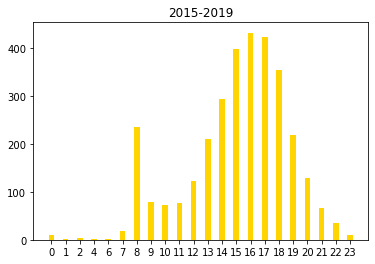

In [56]:
# 2015-2019 발생시간대별

x1=[0,1,2,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
values=[10,1,3,1,1,18,235,78,72,76,122,211,293,398,432,423,355,219,128,67,35,10]

z=np.arange(22)

plt.bar(z,values,width=0.4,color='#ffd400')
plt.xticks(z,x1)
plt.xlabel('') # 사고발생시간
plt.ylabel('')  # 사고발생건수
plt.title('2015-2019') # 한글로 !
plt.show()

In [42]:
# 2015년 사고 발생 
acTime2=ac_origin.loc[:,['발생일','발생시간']]
acTime2['발생일']=pd.to_datetime(acTime2['발생일'])
acTime2['발생일']=acTime2['발생일'].dt.year
acTime2

,발생일,발생시간
72,2015,20
96,2015,9
107,2015,17
129,2015,15
137,2015,9
...,...,...
55382,2019,14
55426,2019,6
55432,2019,13
55454,2019,10


In [78]:
acTime2015=acTime2[acTime2['발생일']==2019]
acTime2015

,발생일,발생시간
44433,2019,17
44528,2019,12
44533,2019,16
44536,2019,17
44572,2019,14
...,...,...
55382,2019,14
55426,2019,6
55432,2019,13
55454,2019,10


In [79]:
acTimee2015=acTime2015['발생시간'].value_counts()
acTimee2015=acTimee2015.sort_index()
acTimee2015=pd.DataFrame(acTimee2015)
acTimee2015

,발생시간
0,3
2,2
6,1
7,4
8,41
9,11
10,12
11,14
12,28
13,38


In [80]:
# 리스트로 값 받기
list_values=list(acTimee2015.loc[:,'발생시간'])
list_values

[3, 2, 1, 4, 41, 11, 12, 14, 28, 38, 55, 86, 85, 91, 75, 45, 24, 11, 6]

In [81]:
list_index=list(acTimee2015.index)
list_index

[0, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

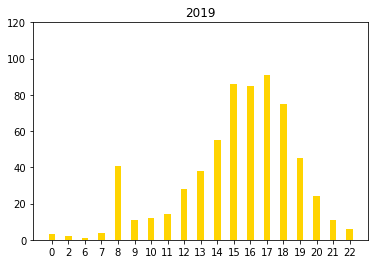

In [82]:
# 연도별 발생 
num1 =np.arange(len(list_index))

plt.bar(num1,list_values,width=0.4,color='#ffd400')
plt.xticks(num1,list_index)
plt.ylim([0,120])
plt.xlabel('')
plt.ylabel('')
plt.title('2019')

plt.show()

In [48]:
# x축이 늘어나는 옐로우카펫 개수
# y축이 연도별 발생건수 ?  시간별로  ?  2015년 -개 2016년 -개 ...

acTime3=acTime2[acTime2['발생일']==2015]
acTime3=acTime3.groupby('발생시간')
acTime3=pd.DataFrame(acTime3)
acTime3

,0,1
0,0,발생일 발생시간 5331 2015 0 10005 201...
1,1,발생일 발생시간 9807 2015 1
2,2,발생일 발생시간 7349 2015 2
3,7,발생일 발생시간 1573 2015 7 3747 201...
4,8,발생일 발생시간 605 2015 8 758 201...
5,9,발생일 발생시간 96 2015 9 137 201...
6,10,발생일 발생시간 843 2015 10 844 201...
7,11,발생일 발생시간 475 2015 11 512 201...
8,12,발생일 발생시간 330 2015 12 488 201...
9,13,발생일 발생시간 184 2015 13 311 201...


In [49]:
acTime2

,발생일,발생시간
72,2015,20
96,2015,9
107,2015,17
129,2015,15
137,2015,9
...,...,...
55382,2019,14
55426,2019,6
55432,2019,13
55454,2019,10


In [50]:
acTimes={'8시':[60,43,45,46,41],
         '14시':[65,61,52,60,55],
         '16시':[110,82,75,82,85],
         '17시':[102,93,62,75,91],
         '19시':[45,53,44,32,45],
         '20시':[31,23,33,17,24]}
acTimes

{'8시': [60, 43, 45, 46, 41],
 '14시': [65, 61, 52, 60, 55],
 '16시': [110, 82, 75, 82, 85],
 '17시': [102, 93, 62, 75, 91],
 '19시': [45, 53, 44, 32, 45],
 '20시': [31, 23, 33, 17, 24]}

In [51]:
acTimes=pd.DataFrame(acTimes)
acTimes

,8시,14시,16시,17시,19시,20시
0,60,65,110,102,45,31
1,43,61,82,93,53,23
2,45,52,75,62,44,33
3,46,60,82,75,32,17
4,41,55,85,91,45,24


In [52]:
acTimes.index=[2015,2016,2017,2018,2019]
acTimes

,8시,14시,16시,17시,19시,20시
2015,60,65,110,102,45,31
2016,43,61,82,93,53,23
2017,45,52,75,62,44,33
2018,46,60,82,75,32,17
2019,41,55,85,91,45,24


In [53]:
d22

2015      1
2016     42
2017    111
2018    140
2019    185
Name: date, dtype: int64

In [54]:
acTimesD=pd.concat([acTimes,d22],axis=1)
acTimesD

,8시,14시,16시,17시,19시,20시,date
2015,60,65,110,102,45,31,1
2016,43,61,82,93,53,23,42
2017,45,52,75,62,44,33,111
2018,46,60,82,75,32,17,140
2019,41,55,85,91,45,24,185


In [55]:
acTimesD.corr()

,8시,14시,16시,17시,19시,20시,date
8시,1.000000,0.693940,0.888261,0.435902,-0.075088,0.432123,-0.729285
14시,0.693940,1.000000,0.776094,0.746508,0.049202,-0.202073,-0.719662
16시,0.888261,0.776094,1.000000,0.772947,0.088177,0.271372,-0.623180
17시,0.435902,0.746508,0.772947,1.000000,0.446792,-0.055286,-0.485608
19시,-0.075088,0.049202,0.088177,0.446792,1.000000,0.429306,-0.456486
20시,0.432123,-0.202073,0.271372,-0.055286,0.429306,1.000000,-0.407732
date,-0.729285,-0.719662,-0.623180,-0.485608,-0.456486,-0.407732,1.000000


In [85]:
acTimesD.rename(columns={'date':'설치개수'},inplace=True)
acTimesD

,8시,14시,16시,17시,19시,20시,설치개수
2015,60,65,110,102,45,31,1
2016,43,61,82,93,53,23,42
2017,45,52,75,62,44,33,111
2018,46,60,82,75,32,17,140
2019,41,55,85,91,45,24,185


In [86]:
acTimesD.corr()

,8시,14시,16시,17시,19시,20시,설치개수
8시,1.000000,0.693940,0.888261,0.435902,-0.075088,0.432123,-0.729285
14시,0.693940,1.000000,0.776094,0.746508,0.049202,-0.202073,-0.719662
16시,0.888261,0.776094,1.000000,0.772947,0.088177,0.271372,-0.623180
17시,0.435902,0.746508,0.772947,1.000000,0.446792,-0.055286,-0.485608
19시,-0.075088,0.049202,0.088177,0.446792,1.000000,0.429306,-0.456486
20시,0.432123,-0.202073,0.271372,-0.055286,0.429306,1.000000,-0.407732
설치개수,-0.729285,-0.719662,-0.623180,-0.485608,-0.456486,-0.407732,1.000000


In [98]:
data1=pd.concat([d11,d22],axis=1)
data1

,사망자수,중상자수,경상자수,부상신고자수,총사상자,date
2015,5,203,434,108,750,1
2016,6,168,375,119,668,42
2017,1,166,371,90,628,111
2018,1,121,364,85,571,140
2019,3,135,420,89,647,185


In [99]:
data1=data1.loc[:,['사망자수','중상자수','경상자수','부상신고자수','date']]
data1

,사망자수,중상자수,경상자수,부상신고자수,date
2015,5,203,434,108,1
2016,6,168,375,119,42
2017,1,166,371,90,111
2018,1,121,364,85,140
2019,3,135,420,89,185


In [100]:
data1.rename(columns={'date':'설치개수'},inplace=True)
data1

,사망자수,중상자수,경상자수,부상신고자수,설치개수
2015,5,203,434,108,1
2016,6,168,375,119,42
2017,1,166,371,90,111
2018,1,121,364,85,140
2019,3,135,420,89,185


In [101]:
data1.corr()

,사망자수,중상자수,경상자수,부상신고자수,설치개수
사망자수,1.000000,0.608577,0.448106,0.935946,-0.694137
중상자수,0.608577,1.000000,0.476820,0.686789,-0.882371
경상자수,0.448106,0.476820,1.000000,0.183717,-0.224889
부상신고자수,0.935946,0.686789,0.183717,1.000000,-0.824378
설치개수,-0.694137,-0.882371,-0.224889,-0.824378,1.000000
